In [12]:
import pandas as pd

# Load dictionary and test data
dictionary_path = 'Dictionary 10.xlsx'
test_data_path = 'TEST DATA.csv'

# Read dictionary from excel file
dictionary_df = pd.read_excel(dictionary_path)

# Read test data from csv file
test_data_df = pd.read_csv(test_data_path)

# Initialize output dataframe with first 2 columns of test data
output_df = test_data_df.iloc[:, :2]

# Initialize dictionary count columns with zeros
for column in dictionary_df.columns:
    output_df[column] = 0

# Function to count matches
def count_matches(sentence, words_list):
    sentence_words = set(sentence.lower().split())
    return sum(word in sentence_words for word in words_list)

# Update output dataframe with counts
for idx, row in test_data_df.iterrows():
    sentence = row[2]  # Assuming the sentence is in the 3rd column
    for column in dictionary_df.columns:
        words_list = dictionary_df[column].dropna().str.lower().tolist()
        output_df.at[idx, column] = count_matches(sentence, words_list)

# Save the output dataframe to a new CSV file
output_file_path = 'Exact match.csv'
output_df.to_csv(output_file_path, index=False)

output_df.head()


C:\Users\rites\AppData\Local\Temp\ipykernel_63160\743579135.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sentence = row[2]  # Assuming the sentence is in the 3rd column


,Text-ID,Sentence-ID,Security,Conformity,Tradition,Benevolence,Universalism,Self-Direction,Stimulation,Hedonism,Achievement,Power
0,BG_002,1,0,0,0,0,0,0,0,0,0,0
1,BG_002,2,0,0,0,0,0,0,0,0,0,0
2,BG_002,3,0,1,0,0,0,0,0,0,0,1
3,BG_002,4,0,0,0,0,0,0,0,0,0,0
4,BG_002,5,0,0,0,0,1,0,0,1,0,0


In [13]:
import pandas as pd

# Load the previously generated output file
output_file_path = 'Exact match.csv'  # Update this path if necessary
output_df = pd.read_csv(output_file_path)

# Define the columns to process
columns_to_process = ["Self-Direction", "Stimulation", "Hedonism", "Achievement", "Power", "Security",
                      "Tradition", "Conformity", "Benevolence", "Universalism"]

# Iterate over each row
for idx, row in output_df.iterrows():
    # Check if all values are 0
    if (row[columns_to_process] == 0).all():
        continue  # Skip updating this row if all values are 0
    
    # Find the maximum value for the row
    max_value = row[columns_to_process].max()
    
    # Update columns: set to 1 if equal to max value, else 0
    for column in columns_to_process:
        output_df.at[idx, column] = 1 if row[column] == max_value else 0

# Save the updated output dataframe to a new CSV file
updated_output_file_path = 'Updated_Output.csv'  # Update this path if necessary
output_df.to_csv(updated_output_file_path, index=False)

output_df.head()


,Text-ID,Sentence-ID,Security,Conformity,Tradition,Benevolence,Universalism,Self-Direction,Stimulation,Hedonism,Achievement,Power
0,BG_002,1,0,0,0,0,0,0,0,0,0,0
1,BG_002,2,0,0,0,0,0,0,0,0,0,0
2,BG_002,3,0,1,0,0,0,0,0,0,0,1
3,BG_002,4,0,0,0,0,0,0,0,0,0,0
4,BG_002,5,0,0,0,0,1,0,0,1,0,0


In [14]:
import pandas as pd

# Load the test score and updated output files
test_score_path = 'TEST SCORE UPD.csv'  # Update this path if necessary
updated_output_path = 'Updated_Output.csv'  # Update this path if necessary

test_score_df = pd.read_csv(test_score_path)
updated_output_df = pd.read_csv(updated_output_path)

# Print the column names to check for discrepancies
print("Test Score Columns:")
print(test_score_df.columns)

print("\nUpdated Output Columns:")
print(updated_output_df.columns)

# Define the columns to process (update these if necessary based on the above output)
columns_to_process = ["Security", "Conformity", "Tradition", "Benevolence", "Universalism", 
                      "Self-Direction", "Stimulation", "Hedonism", "Achievement", "Power"]

# Merge dataframes based on Text-ID and Sentence-ID
merged_df = test_score_df.merge(updated_output_df, on=['Text-ID', 'Sentence-ID'], suffixes=('_test', '_updated'))

# Function to find headers with value 1
def find_headers_with_one(row, suffix):
    return ','.join([col for col in columns_to_process if row[f"{col}{suffix}"] == 1])

# Add new columns for headers with value 1
merged_df['Headers_1_test'] = merged_df.apply(lambda row: find_headers_with_one(row, '_test'), axis=1)
merged_df['Headers_1_updated'] = merged_df.apply(lambda row: find_headers_with_one(row, '_updated'), axis=1)

# Reorder columns
final_columns = ['Text-ID', 'Sentence-ID'] + \
                [f"{col}_test" for col in columns_to_process] + \
                [f"{col}_updated" for col in columns_to_process] + \
                ['Headers_1_test', 'Headers_1_updated']

final_df = merged_df[final_columns]

# Save to a new Excel file
output_excel_path = 'Combined_Output.xlsx'  # Update this path if necessary
final_df.to_excel(output_excel_path, index=False)

final_df.head()


Test Score Columns:
Index(['Text-ID', 'Sentence-ID', 'Security', 'Conformity', 'Tradition',
       'Benevolence', 'Universalism', 'Self-Direction', 'Stimulation',
       'Hedonism', 'Achievement', 'Power'],
      dtype='object')

Updated Output Columns:
Index(['Text-ID', 'Sentence-ID', 'Security', 'Conformity', 'Tradition',
       'Benevolence', 'Universalism', 'Self-Direction', 'Stimulation',
       'Hedonism', 'Achievement', 'Power'],
      dtype='object')


,Text-ID,Sentence-ID,Security_test,Conformity_test,Tradition_test,Benevolence_test,Universalism_test,Self-Direction_test,Stimulation_test,Hedonism_test,...,Tradition_updated,Benevolence_updated,Universalism_updated,Self-Direction_updated,Stimulation_updated,Hedonism_updated,Achievement_updated,Power_updated,Headers_1_test,Headers_1_updated
0,BG_002,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Conformity,
1,BG_002,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Conformity,
2,BG_002,3,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,"Conformity,Hedonism","Conformity,Power"
3,BG_002,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Conformity,
4,BG_002,5,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,Conformity,"Universalism,Hedonism"


In [15]:
import pandas as pd

# Load the combined output file
combined_output_path = 'Combined_Output.xlsx'
combined_df = pd.read_excel(combined_output_path)

# Function to calculate the match percentage
def calculate_match_percentage(test_headers, updated_headers):
    if pd.isna(test_headers) and pd.isna(updated_headers):
        return 1.0, 1.0
    
    test_words = set(str(test_headers).split(',')) if pd.notna(test_headers) else set()
    updated_words = set(str(updated_headers).split(',')) if pd.notna(updated_headers) else set()
    
    matches = test_words.intersection(updated_words)
    num_matches = len(matches)
    
    test_percentage = num_matches / len(test_words) if test_words else 0.0
    updated_percentage = num_matches / len(updated_words) if updated_words else 0.0
    
    return test_percentage, updated_percentage

# Apply the function to each row and create new columns
combined_df[['Test_Match_Percentage', 'Updated_Match_Percentage']] = combined_df.apply(
    lambda row: calculate_match_percentage(row['Headers_1_test'], row['Headers_1_updated']), axis=1, result_type='expand'
)

# Calculate the total score for each column
total_rows = len(combined_df)
test_total_score = combined_df['Test_Match_Percentage'].sum() / total_rows
updated_total_score = combined_df['Updated_Match_Percentage'].sum() / total_rows

# Add the total score to the dataframe
combined_df.loc['Total'] = combined_df.sum(numeric_only=True)
combined_df.at['Total', 'Test_Match_Percentage'] = test_total_score
combined_df.at['Total', 'Updated_Match_Percentage'] = updated_total_score

# Save the updated dataframe to a new Excel file
updated_combined_output_path = 'Exact Updated_Combined_Output.xlsx'
combined_df.to_excel(updated_combined_output_path, index=False)

combined_df.head(), test_total_score, updated_total_score


(  Text-ID  Sentence-ID  Security_test  Conformity_test  Tradition_test  \
 0  BG_002          1.0            0.0              1.0             0.0   
 1  BG_002          2.0            0.0              1.0             0.0   
 2  BG_002          3.0            0.0              1.0             0.0   
 3  BG_002          4.0            0.0              1.0             0.0   
 4  BG_002          5.0            0.0              1.0             0.0   
 
    Benevolence_test  Universalism_test  Self-Direction_test  Stimulation_test  \
 0               0.0                0.0                  0.0               0.0   
 1               0.0                0.0                  0.0               0.0   
 2               0.0                0.0                  0.0               0.0   
 3               0.0                0.0                  0.0               0.0   
 4               0.0                0.0                  0.0               0.0   
 
    Hedonism_test  ...  Universalism_updated  Self-Dir

In [62]:
import pandas as pd

# Load the Excel file
file_path = 'Exact Updated_Combined_Output.xlsx'
data = pd.read_excel(file_path)

# Define the conditions for each category
exact_match = data[(data['Test_Match_Percentage'] == 1)]
partial_match = data[(data['Test_Match_Percentage'] > 0) & (data['Test_Match_Percentage'] < 1)]
different_value = data[(data['Test_Match_Percentage'] == 0) & (data['Headers_1_updated'].notnull()) & (data['Headers_1_updated'] != '')]
blank_value = data[(data['Test_Match_Percentage'] == 0) & (data['Headers_1_updated'].isnull() | (data['Headers_1_updated'] == ''))]

# Count the number of rows in each category
categories = {
    'Exact Match': exact_match.shape[0],
    'Partial Match': partial_match.shape[0],
    'Different Value': different_value.shape[0],
    'Blank Value': blank_value.shape[0]
}

# Output the field names and their respective counts
for category, count in categories.items():
    print(f"{category}: {count}")


Exact Match: 23309
Partial Match: 1338
Different Value: 24925
Blank Value: 10091


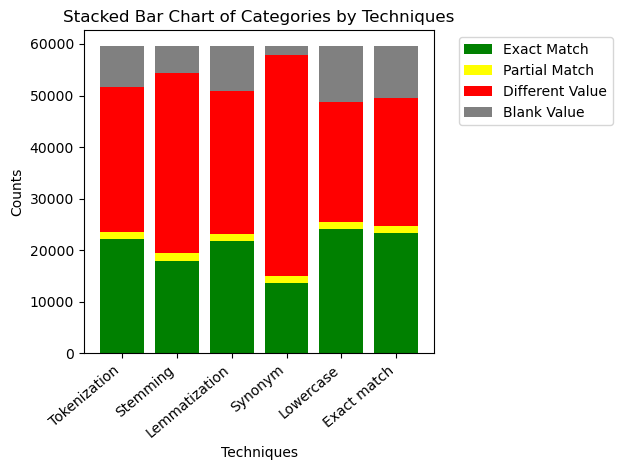

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for each category and technique
categories = ['Exact Match', 'Partial Match', 'Different Value', 'Blank Value']
techniques = ['Tokenization', 'Stemming', 'Lemmatization', 'Synonym', 'Lowercase', 'Exact match']

# The corresponding data for each category and technique
exact_match_data = [22160, 17979, 21880, 13637, 24157, 23309]
partial_match_data = [1429, 1409, 1305, 1409, 1292, 1338]
different_value_data = [27986, 34986, 27763, 42865, 23228, 24925]
blank_value_data = [8088, 5289, 8715, 1752, 10986, 10091]

# Create an array for the x-axis
x = np.arange(len(techniques))

# Plotting the stacked bar chart
fig, ax = plt.subplots()

ax.bar(x, exact_match_data, label='Exact Match', color='green')
ax.bar(x, partial_match_data, bottom=exact_match_data, label='Partial Match', color='yellow')
ax.bar(x, different_value_data, bottom=np.array(exact_match_data) + np.array(partial_match_data), label='Different Value', color='red')
ax.bar(x, blank_value_data, bottom=np.array(exact_match_data) + np.array(partial_match_data) + np.array(different_value_data), label='Blank Value', color='grey')

# Add labels, title, and legend
ax.set_xlabel('Techniques')
ax.set_ylabel('Counts')
ax.set_title('Stacked Bar Chart of Categories by Techniques')
ax.set_xticks(x)
ax.set_xticklabels(techniques, rotation=40, ha='right')  # Rotate labels and align to the right

# Move the legend to the side
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Display the chart
plt.show()


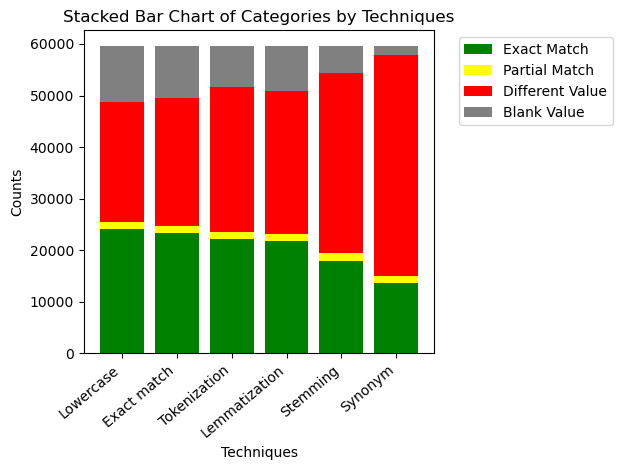

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for each category and technique
categories = ['Exact Match', 'Partial Match', 'Different Value', 'Blank Value']
techniques = ['Lowercase', 'Exact match', 'Tokenization', 'Lemmatization', 'Stemming', 'Synonym']

# The corresponding data for each category and technique in the updated order
exact_match_data = [24157, 23309, 22160, 21880, 17979, 13637]
partial_match_data = [1292, 1338, 1429, 1305, 1409, 1409]
different_value_data = [23228, 24925, 27986, 27763, 34986, 42865]
blank_value_data = [10986, 10091, 8088, 8715, 5289, 1752]

# Create an array for the x-axis
x = np.arange(len(techniques))

# Plotting the stacked bar chart
fig, ax = plt.subplots()

ax.bar(x, exact_match_data, label='Exact Match', color='green')
ax.bar(x, partial_match_data, bottom=exact_match_data, label='Partial Match', color='yellow')
ax.bar(x, different_value_data, bottom=np.array(exact_match_data) + np.array(partial_match_data), label='Different Value', color='red')
ax.bar(x, blank_value_data, bottom=np.array(exact_match_data) + np.array(partial_match_data) + np.array(different_value_data), label='Blank Value', color='grey')

# Add labels, title, and legend
ax.set_xlabel('Techniques')
ax.set_ylabel('Counts')
ax.set_title('Stacked Bar Chart of Categories by Techniques')
ax.set_xticks(x)
ax.set_xticklabels(techniques, rotation=40, ha='right')  # Rotate labels and align to the right

# Move the legend to the side
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Display the chart
plt.show()


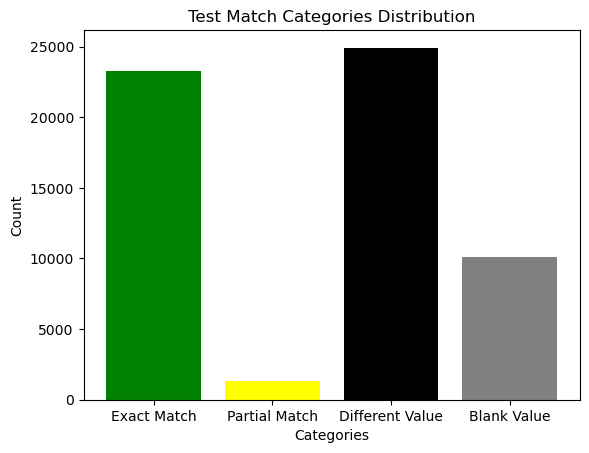

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Exact Updated_Combined_Output.xlsx'
data = pd.read_excel(file_path)

# Define the conditions for each category
exact_match = data[(data['Test_Match_Percentage'] == 1)]
partial_match = data[(data['Test_Match_Percentage'] > 0) & (data['Test_Match_Percentage'] < 1)]
different_value = data[(data['Test_Match_Percentage'] == 0) & (data['Headers_1_updated'].notnull()) & (data['Headers_1_updated'] != '')]
blank_value = data[(data['Test_Match_Percentage'] == 0) & (data['Headers_1_updated'].isnull() | (data['Headers_1_updated'] == ''))]

# Count the number of rows in each category
categories = {
    'Exact Match': exact_match.shape[0],
    'Partial Match': partial_match.shape[0],
    'Different Value': different_value.shape[0],
    'Blank Value': blank_value.shape[0]
}

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(categories.keys(), categories.values(), color=['green', 'yellow', 'black', 'grey'])

# Add labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Count')
ax.set_title('Test Match Categories Distribution')

# Display the bar chart
plt.show()


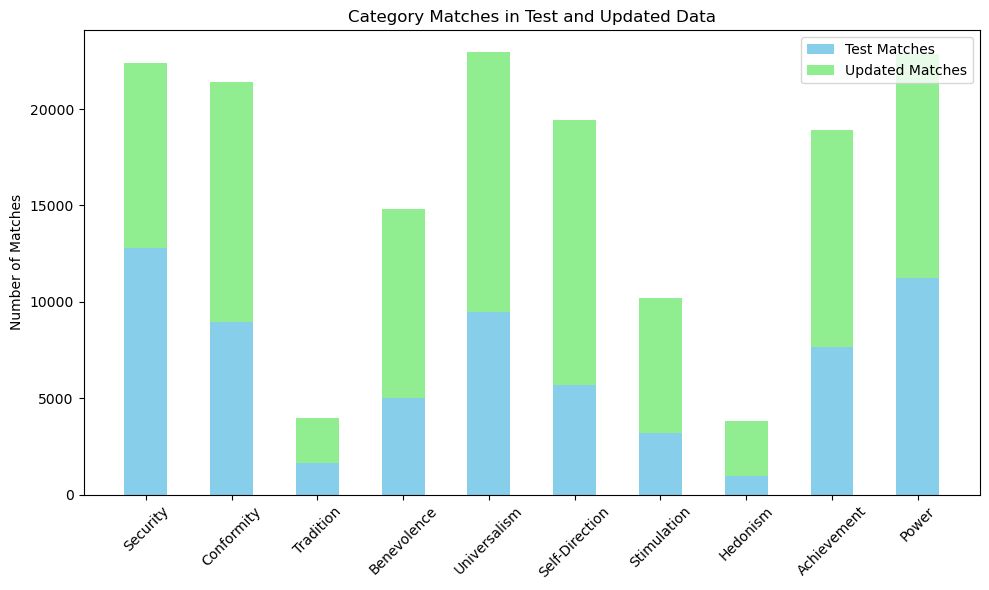

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming combined_df is already loaded
categories = ["Security", "Conformity", "Tradition", "Benevolence", "Universalism", 
              "Self-Direction", "Stimulation", "Hedonism", "Achievement", "Power"]

# Calculate the counts for matches in the test and updated datasets
test_counts = combined_df[[f'{col}_test' for col in categories]].sum().values
updated_counts = combined_df[[f'{col}_updated' for col in categories]].sum().values

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.5
index = np.arange(len(categories))

p1 = plt.bar(index, test_counts, bar_width, label='Test Matches', color='skyblue')
p2 = plt.bar(index, updated_counts, bar_width, bottom=test_counts, label='Updated Matches', color='lightgreen')

plt.ylabel('Number of Matches')
plt.title('Category Matches in Test and Updated Data')
plt.xticks(index, categories, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [48]:
import pandas as pd

# Load the Excel file
file_path = 'Exact Updated_Combined_Output.xlsx'
df = pd.read_excel(file_path)

# Define the 10 human behaviors and the additional "Blank" category
human_behaviors = [
    "Security", "Conformity", "Tradition", "Benevolence", "Universalism",
    "Self-Direction", "Stimulation", "Hedonism", "Achievement", "Power"
]

# Initialize dictionaries to hold the counts for each category
behavior_counts = {behavior: 0 for behavior in human_behaviors}
matching_counts = {behavior: 0 for behavior in human_behaviors}
not_matching_counts = {behavior: 0 for behavior in human_behaviors}
blank_counts = {behavior: 0 for behavior in human_behaviors}

# Initialize counts for "Blank"
behavior_counts["Blank"] = 0
matching_counts["Blank"] = 0
not_matching_counts["Blank"] = 0
blank_counts["Blank"] = 0

# Iterate over each row in the dataframe
for index, row in df.iterrows():
    test_value = row['Headers_1_test']
    updated_value = row['Headers_1_updated']
    
    if pd.isnull(test_value):  # Case when Headers_1_test is blank or null
        behavior_counts["Blank"] += 1
        if pd.isnull(updated_value):
            blank_counts["Blank"] += 1
        else:
            not_matching_counts["Blank"] += 1
    else:  # Case when Headers_1_test is not blank
        # Split the behaviors by a delimiter (assuming behaviors are separated by commas)
        behaviors = [behavior.strip() for behavior in test_value.split(',')]
        updated_behaviors = set(updated_value.split(',')) if pd.notnull(updated_value) else set()

        for behavior in behaviors:
            behavior_counts[behavior] += 1
            
            if behavior in updated_behaviors:
                matching_counts[behavior] += 1
            elif pd.notnull(updated_value):
                not_matching_counts[behavior] += 1
            else:
                blank_counts[behavior] += 1

# Convert the dictionary to a DataFrame for easier output
output_df = pd.DataFrame({
    "Behavior": list(behavior_counts.keys()),
    "Behavior count": list(behavior_counts.values()),
    "Matching": list(matching_counts.values()),
    "Not matching": list(not_matching_counts.values()),
    "Blank": list(blank_counts.values())
})

# Save the results to an Excel file
output_file_path = 'Exact_match_Human_Behavior_Analysis.xlsx'
output_df.to_excel(output_file_path, index=False)

print(f"Analysis complete. The output file is saved as {output_file_path}")


Analysis complete. The output file is saved as Exact_match_Human_Behavior_Analysis.xlsx


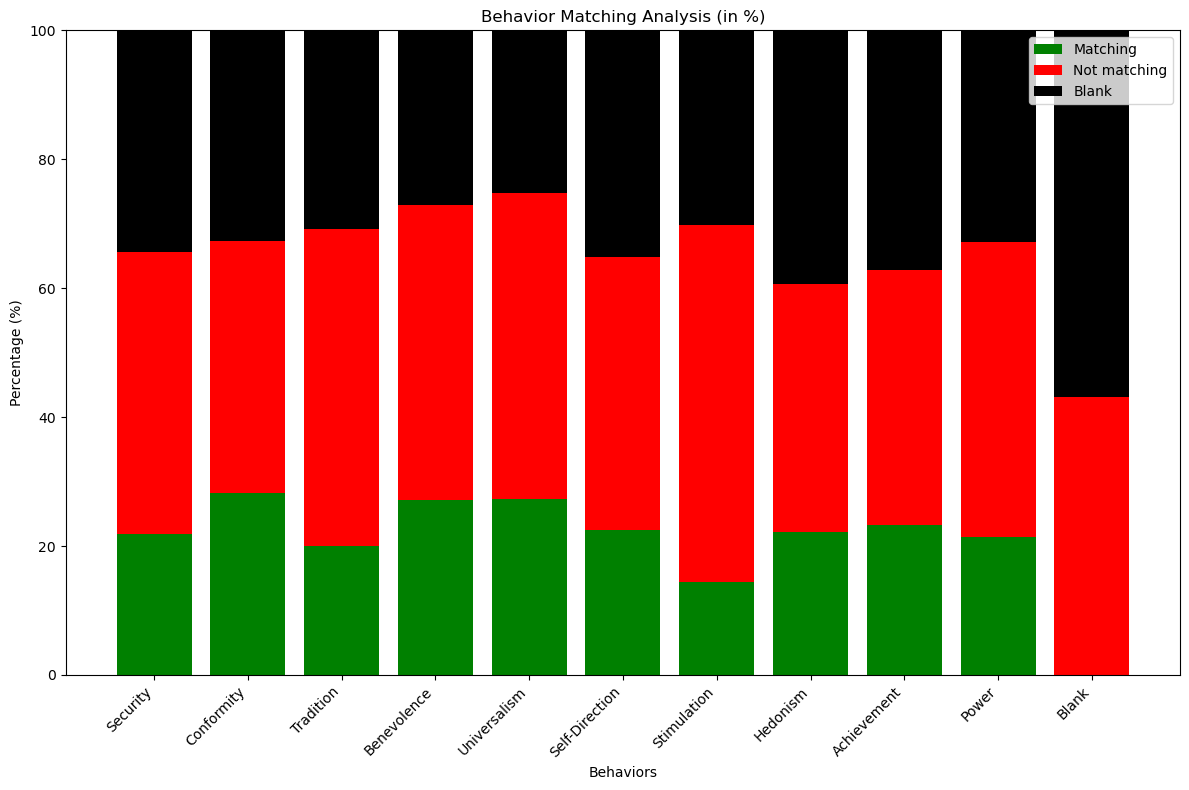

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file generated from the previous step
file_path = 'Exact_match_Human_Behavior_Analysis.xlsx'
df = pd.read_excel(file_path)

# Calculate the total number of entries for each behavior (including "Blank")
df['Total'] = df[['Matching', 'Not matching', 'Blank']].sum(axis=1)

# Calculate the percentage for each category
df['Matching %'] = (df['Matching'] / df['Total']) * 100
df['Not matching %'] = (df['Not matching'] / df['Total']) * 100
df['Blank %'] = (df['Blank'] / df['Total']) * 100

# Plotting the stacked bar graph
plt.figure(figsize=(12, 8))

# Stacked bar chart with percentages
plt.bar(df['Behavior'], df['Matching %'], color='green', label='Matching')
plt.bar(df['Behavior'], df['Not matching %'], bottom=df['Matching %'], color='red', label='Not matching')
plt.bar(df['Behavior'], df['Blank %'], bottom=df['Matching %'] + df['Not matching %'], color='black', label='Blank')

# Add labels and title
plt.xlabel('Behaviors')
plt.ylabel('Percentage (%)')
plt.title('Behavior Matching Analysis (in %)')
plt.legend()

# Set y-axis to range from 0 to 100
plt.ylim(0, 100)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()